In [ ]:
import pandas as pd
import typing
import numpy as np
import config
# type: ignore
from datetime import timedelta
import plotly.express as px

In [ ]:
data = pd.read_pickle('../project/data/data_for_mvp.pickle')
data

,shop_name,journey_start_ts,journey_end_ts,journey_success,total_price,time_between_order_and_step,tw_source,tw_adid,len_tw_source
2238518,beauty_shop_1,2022-12-20 21:35:31.046000+00:00,2022-12-20 21:35:31.046000+00:00,0,None,[],[Voyage],[unset],1
2222527,beauty_shop_1,2022-12-20 10:42:23.136000+00:00,2022-12-20 10:42:23.136000+00:00,0,None,[],[bing],[unset],1
2313803,beauty_shop_1,2022-12-23 14:44:49.365000+00:00,2022-12-23 15:03:19.863000+00:00,0,None,[],"[listrak, listrak]","[unset, unset]",2
2168179,beauty_shop_1,2022-12-18 15:51:02.264000+00:00,2022-12-22 13:18:46.830000+00:00,0,None,[],"[listrak, listrak]","[unset, unset]",2
2326090,beauty_shop_1,2022-12-23 23:28:04.561000+00:00,2022-12-23 23:28:04.561000+00:00,0,None,[],[facebook],[23852462247460628],1
...,...,...,...,...,...,...,...,...,...
5534884,beauty_shop_2,2022-12-19 18:27:32.330000+00:00,2022-12-19 18:27:32.330000+00:00,0,None,[],[google],[unset],1
2294232,beauty_shop_1,2022-12-22 20:04:01.096000+00:00,2022-12-22 20:04:01.096000+00:00,0,None,[],[Voyage],[unset],1
2224899,beauty_shop_1,2022-12-20 12:59:52.942000+00:00,2022-12-20 12:59:52.942000+00:00,0,None,[],[facebook],[23852462247460628],1
5501782,beauty_shop_2,2022-12-18 13:40:51.214000+00:00,2022-12-18 13:42:06.562000+00:00,0,None,[],[pubexchange],[unset],1


In [85]:
data[data['journey_success'] == 1]['time_between_order_and_step'][186552][0]

8693.522483333332

In [100]:
def mean_channel_attribution_time(data):
    data = data[data.journey_success == 1]
    data_dic_timing = {}
    all_channels = []
    for i in data.index:
        used_sources = []
        for j in range(len(data['tw_source'][i])):
            if data['tw_source'][i][j] not in used_sources:
                if data['tw_source'][i][j] in data_dic_timing:
                    data_dic_timing[data['tw_source'][i][j]] += data['time_between_order_and_step'][i][j]
                    data_dic_timing[f"{data['tw_source'][i][j]}_place"] += j / len(data['tw_source'][i])
                    data_dic_timing[f"{data['tw_source'][i][j]}_times"] += 1
                else:
                    data_dic_timing[data['tw_source'][i][j]] = data['time_between_order_and_step'][i][j]
                    data_dic_timing[f"{data['tw_source'][i][j]}_place"] = j / len(data['tw_source'][i])
                    data_dic_timing[f"{data['tw_source'][i][j]}_times"] = 1
                    all_channels.append(data['tw_source'][i][j])
                used_sources.append(data['tw_source'][i][j])
    for channel in all_channels:
        data_dic_timing[channel] = data_dic_timing[channel]/data_dic_timing[f"{channel}_times"]
        data_dic_timing[f"{channel}_place"] = data_dic_timing[f"{channel}_place"]/data_dic_timing[f"{channel}_times"]
    return all_channels, data_dic_timing

In [102]:
mcat = mean_channel_attribution_time(data)


In [ ]:
from utils.data import *
data_shop_1, data_shop_2 = prepare_data(data)

/Users/elizavetapetaeva/Documents/Диплом/diploma-mta/functions.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/elizavetapetaeva/Documents/Диплом/diploma-mta/functions.py:70: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/elizavetapetaeva/Documents/Диплом/diploma-mta/functions.py:72: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [139]:
data_shop_1

,shop_name,journey_start_ts,journey_end_ts,journey_success,total_price,time_between_order_and_step,tw_source,tw_adid,len_tw_source,tw_source_clean
2238518,beauty_shop_1,2022-12-20 21:35:31.046000+00:00,2022-12-20 21:35:31.046000+00:00,0,NaN,[],[Voyage],[unset],1,[voyage]
2222527,beauty_shop_1,2022-12-20 10:42:23.136000+00:00,2022-12-20 10:42:23.136000+00:00,0,NaN,[],[bing],[unset],1,[bing]
2313803,beauty_shop_1,2022-12-23 14:44:49.365000+00:00,2022-12-23 15:03:19.863000+00:00,0,NaN,[],"[listrak, listrak]","[unset, unset]",2,"[listrak, listrak]"
2168179,beauty_shop_1,2022-12-18 15:51:02.264000+00:00,2022-12-22 13:18:46.830000+00:00,0,NaN,[],"[listrak, listrak]","[unset, unset]",2,"[listrak, listrak]"
2326090,beauty_shop_1,2022-12-23 23:28:04.561000+00:00,2022-12-23 23:28:04.561000+00:00,0,NaN,[],[facebook],[23852462247460628],1,[facebook]
...,...,...,...,...,...,...,...,...,...,...
2233992,beauty_shop_1,2022-12-20 19:15:01.217000+00:00,2022-12-20 19:16:40.142000+00:00,0,NaN,[],[google],[631047265328],1,[google]
2192483,beauty_shop_1,2022-12-19 12:13:12.230000+00:00,2022-12-19 12:24:25.207000+00:00,0,NaN,[],"[Outbrain, Outbrain]","[unset, unset]",2,"[outbrain, outbrain]"
2294232,beauty_shop_1,2022-12-22 20:04:01.096000+00:00,2022-12-22 20:04:01.096000+00:00,0,NaN,[],[Voyage],[unset],1,[voyage]
2224899,beauty_shop_1,2022-12-20 12:59:52.942000+00:00,2022-12-20 12:59:52.942000+00:00,0,NaN,[],[facebook],[23852462247460628],1,[facebook]


In [108]:
mcat[1]

{'listrak': 5667.108665864307,
 'listrak_place': 0.07173148763493667,
 'listrak_times': 4923,
 'Voyage': 5793.78949011049,
 'Voyage_place': 0.13864962555550442,
 'Voyage_times': 1237,
 'google': 2442.2986573668236,
 'google_place': 0.07447500990569801,
 'google_times': 4837,
 'facebook': 1540.2590988735576,
 'facebook_place': 0.01310808505412424,
 'facebook_times': 5001,
 'affiliate': 2050.963989033192,
 'affiliate_place': 0.229812595663576,
 'affiliate_times': 1617,
 'cj': 808.8681028917911,
 'cj_place': 0.2714031304516378,
 'cj_times': 536,
 'grin': 1838.0352264026403,
 'grin_place': 0.10355529913893644,
 'grin_times': 101,
 'Outbrain': 3569.620386540487,
 'Outbrain_place': 0.023139939279809684,
 'Outbrain_times': 951,
 'kl': 4368.618673757389,
 'kl_place': 0.047350560058197204,
 'kl_times': 959,
 'wunderkind': 1487.1590357767639,
 'wunderkind_place': 0.24885039375912119,
 'wunderkind_times': 1753,
 'socialmediaposts': 1765.3700112021854,
 'socialmediaposts_place': 0.1580973789811993

In [125]:
mean_time = {}
mean_place = {}
times = {}
for element in mcat[0]:
    mean_time[element] = mcat[1][element] / (60 * 24)
    mean_place[element] = mcat[1][f"{element}_place"]
    times[element] = mcat[1][f"{element}_times"]


In [126]:
a = sort_most_popular_platforms(mean_time, len(mean_time))

In [127]:
px.bar(x=a.keys(), y=a.values(), title='Среднее время между покупкой и первым контактом с каналом',
                                 labels={'x': 'Канал', 'y': 'Время (дни)'})

dict_values([9.35136062334656, 7.447487060448233, 5.487373981625257, 4.58668697337963, 4.023464923687841, 3.9924243380042985, 3.9354921290724354, 3.2717260523148144, 3.0683823148148153, 3.0337629678870757, 2.4789030462086714, 1.6960407342825163, 1.4497801899871945, 1.4242805479397165, 1.4160267649391287, 1.38656, 1.2764133516685001, 1.2259513966681843, 1.0696243742177483, 1.0327493304005304, 0.8841673544973544, 0.855044390380313, 0.8450142129629631, 0.7885590972222223, 0.7706754206612584, 0.630783905909586, 0.626967663502656, 0.6142998263888888, 0.5617139603415215, 0.4767649082056195, 0.10359341162854031, 0.06519789351851851, 0.054196331018518513, 0.042062100694444444, 0.017614542824074073, 0.013305243055555558, 0.006896967592592593, 0.006849166666666667, 0.006400190972222222, 0.0045963194444444445, 0.0019014583333333336, 0.0017250231481481483])

In [ ]:
px.bar(x=a.keys(), y=a.values(), title='Среднее время между покупкой и первым контактом с каналом',
                                 labels={'x': 'Канал', 'y': 'Время (дни)'})

# Data stats

In [ ]:
import pandas as pd
from functions import prepare_data, fig_calculate_channels


data = pd.read_pickle('../project/data/data_for_mvp.csv')


In [3]:
df = data.copy()

In [4]:
data = data[(data['journey_end_ts'] >= '2022-01-01')&(data['journey_end_ts'] <= '2022-12-31')]
data_shop_1, data_shop_2 = prepare_data(data)
fig = fig_calculate_channels(data_shop_1)

/Users/elizavetapetaeva/Documents/Диплом/diploma-mta/functions.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shop_2['tw_source_clean'] = data_shop_2['tw_source'].apply(lambda x: clean_data(x))
/Users/elizavetapetaeva/Documents/Диплом/diploma-mta/functions.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shop_1['tw_source_clean'] = data_shop_1['tw_source'].apply(lambda x: clean_data(x))
/Users/elizavetapetaeva/Documents/Диплом/diploma-mta/functions.py:83: SettingWithCopyWarning: 
A value

In [5]:
data_shop_1.shape, data_shop_2.shape

((2188179, 12), (1446319, 12))

In [6]:
data_shop_2[(data_shop_2['journey_success'] == 1)&(data_shop_2['journey_end_ts'] >= '2022-01-01')&(data_shop_2['journey_end_ts'] <= '2022-12-31')]['total_price'].mean()

102.14708387805757

In [18]:
# from functions import *
# data = pd.read_csv('/Users/elizavetapetaeva/Documents/Диплом/journeys_data_for_test.csv')
# data['tw_source'] = data['tw_source'].apply(lambda x: ast.literal_eval(x))
# data.loc[data.shop_name == 'laurageller.myshopify.com', 'shop_name'] = 'beauty_shop_1' 
# data.loc[data.shop_name == 'vegalash.myshopify.com', 'shop_name'] = 'beauty_shop_2'
# data_shop_1, data_shop_2 = prepare_data(data)

/Users/elizavetapetaeva/Documents/Диплом/diploma-mta/functions.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/elizavetapetaeva/Documents/Диплом/diploma-mta/functions.py:70: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/elizavetapetaeva/Documents/Диплом/diploma-mta/functions.py:72: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [38]:
mta_data_shops, budget = prep_data_for_markov_shapley(data_shop_1)

/Users/elizavetapetaeva/Documents/Диплом/diploma-mta/functions.py:283: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data = pd.read_csv('../project/data/data_for_mvp.csv')
data['tw_source'] = data['tw_source'].apply(lambda x: ast.literal_eval(x))
data.loc[data.shop_name == 'laurageller.myshopify.com', 'shop_name'] = 'beauty_shop_1' 
data.loc[data.shop_name == 'vegalash.myshopify.com', 'shop_name'] = 'beauty_shop_2'

In [ ]:
data_for_mvp = data[(data.journey_end_ts > '2022-12-01') & (data.journey_end_ts < '2022-12-31')].reset_index(drop=True)
data_for_mvp.to_csv('data_for_mvp.csv', index=False)

# clean data

In [ ]:
ount_all_platforms = {}

for j in data_shop_2['tw_source_clean']:
    for source in j:
        if source in count_all_platforms:
            count_all_platforms[source] += 1
        else:
            count_all_platforms[source] = 1

In [13]:
from functions import *
most_popular_platforms = sort_most_popular_platforms(count_all_platforms, 10)
px.bar(x=list(most_popular_platforms.keys()), y=list(most_popular_platforms.values()), 
       title='Количество появлений платформ в путях data_shop_2', labels={'x': 'Канал', 'y': 'Количество появлений канала'})

In [68]:
calc_total_price(data, 'laurageller.myshopify.com', '2022-10-01', '2022-03-01')

6720219.54

In [54]:
data_shop_2[data_shop_2['len_tw_source'] == i].shape[0]

0

In [17]:
prob_buy = {}
for i in range(1, 100):
    paths = data_shop_1[data_shop_1['len_tw_source'] == i].shape[0]
    if paths != 0:
        prob_buy[i] = data_shop_1[(data_shop_1['len_tw_source'] == i) & (data_shop_1['journey_success'] == 1)].shape[0] / paths
    else:
        prob_buy[i] = 0

In [18]:
px.bar(x=prob_buy.keys(), y=prob_buy.values(), 
       title='Вероятность покупки в зависимости от длины пути beauty_shop_1', 
       labels={'x': 'Длина пути', 'y': 'Вероятность покупки'})

In [8]:
money_buy = {}
for i in range(1, 100):
    money_buy[i] = data_shop_2[(data_shop_2['len_tw_source'] == i) & (data_shop_2['journey_success'] == 1)]['total_price'].sum()

mean_money_buy = {}
for i in range(1, 100):
    mean_money_buy[i] = data_shop_2[(data_shop_2['len_tw_source'] == i) & (data_shop_2['journey_success'] == 1)]['total_price'].mean()


In [24]:
px.bar(x=money_buy.keys(), y=money_buy.values(), labels={'x': 'Длина пути', 'y': 'Количество потраченных денег'},
       title='Деньги потраченные покупателями на покупки в зависимости от длины пути beauty_shop_1')

In [28]:
px.bar(x=mean_money_buy.keys(), y=mean_money_buy.values(), labels={'x': 'Длина пути', 'y': 'Средний чек'},
       title='Средний чек покупателей в зависимости от длины пути beauty_shop_2')

In [26]:
np.round(data, 3)

0     100.779
1      98.219
2     102.108
3     104.354
4     108.787
5     110.126
6     114.658
7     114.307
8     119.768
9     122.494
10    123.903
11    117.834
12    121.087
13    119.494
14    116.694
15    121.828
16    133.096
17    118.080
18    143.695
19    107.929
20    142.515
21    104.290
22    105.387
23    125.289
24    111.412
25    107.250
26    107.726
27    164.625
28    131.382
29    149.897
dtype: float64

In [12]:
list(mean_money_buy.values())[:15]

[100.77915124153498,
 98.21896686950643,
 102.10841714860447,
 104.35378486511203,
 108.78657320872274,
 110.12638840979649,
 114.65816618911175,
 114.3068600682594,
 119.76769830949287,
 122.49354838709677,
 123.90301837270341,
 117.83382978723404,
 121.08690265486726,
 119.4939751552795,
 116.69385245901638]

In [14]:

list(mean_money_buy.values())[15:30]

[121.82793814432989,
 133.09623529411766,
 118.07983606557377,
 143.6953488372093,
 107.92947368421052,
 142.51533333333333,
 104.28958333333333,
 105.38730769230769,
 125.28866666666664,
 111.41166666666668,
 107.25,
 107.72625,
 164.62545454545455,
 131.382,
 149.89666666666668]

In [21]:
pd.Series(list(mean_money_buy.values())[:15])

0     100.779151
1      98.218967
2     102.108417
3     104.353785
4     108.786573
5     110.126388
6     114.658166
7     114.306860
8     119.767698
9     122.493548
10    123.903018
11    117.833830
12    121.086903
13    119.493975
14    116.693852
dtype: float64

In [23]:
import scipy.stats as stats

data_1 = pd.Series(list(mean_money_buy.values())[:15])
data_2 = pd.Series(list(mean_money_buy.values())[15:30])
data = pd.concat([data_1, data_2]).reset_index(drop=True)
# сделаем генеральное распределение для проведение теста
test_leven, p = stats.levene(data_1, data_2)
print('Statistics=%.3f, p-value=%.3f' % (test_leven, p))
alpha = 0.05

stat, p = stats.shapiro(data)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

if p < alpha:
    print('Отклонить гипотезу о нормальности')
else:
    print('Принять гипотезу о нормальности')

# Statistics=0.919, p-value=0.000


Statistics=7.720, p-value=0.010
Statistics=0.906, p-value=0.012
Отклонить гипотезу о нормальности


In [35]:
data_len_stat = data_shop_2[data_shop_2.journey_success == 1].groupby(['len_tw_source']).count()['journey_id']
px.bar(x=data_len_stat.index, y=data_len_stat, labels={'x': 'Длина пути', 'y': 'Количество путей'},
       title='Количество путей заданной длины, beauty_shop_2 (только заказы)')

In [38]:
data_mmm = pd.read_csv('final_final_mmm.csv', index_col=0)

In [39]:
data_mmm

,event_date,provider_account,total_price,total_price_usd,facebook-ads,google-ads,tiktok-ads,pinterest-ads,snapchat-ads,amazon
0,2022-01-02,beauty_shop_1,173954.53,173954.53,31846.09,3593.454221,0.00,0.000000,0.0,0.00
0,2022-01-03,beauty_shop_1,121306.46,121306.46,26763.07,3065.191590,0.00,0.000000,0.0,0.00
0,2022-01-04,beauty_shop_1,123855.43,123855.43,29146.16,4055.082771,0.00,0.000000,0.0,0.00
0,2022-01-05,beauty_shop_1,159204.16,159204.16,32020.69,3944.105033,0.00,0.000000,0.0,0.00
0,2022-01-06,beauty_shop_1,162325.69,162325.69,31756.35,4162.369325,0.00,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
0,2023-01-26,beauty_shop_2,393221.85,393221.85,58249.63,37219.644367,6889.61,1895.073149,0.0,7530.54
0,2023-01-27,beauty_shop_2,412449.83,412449.83,60038.12,42078.910491,6259.95,1201.533601,0.0,6738.74
0,2023-01-28,beauty_shop_2,376156.59,376156.59,64499.36,39330.151761,5162.26,1200.041661,0.0,7477.14
0,2023-01-29,beauty_shop_2,351264.41,351264.41,68114.69,42613.730766,5882.97,1200.040646,0.0,8675.93


In [ ]:
import plotly.graph_objects as go

selected_shop = 'beauty_shop_2'
data_revenue = data_mmm[data_mmm['provider_account'] == selected_shop]
fig_revenue = go.Figure()

fig_revenue.add_trace(go.Scatter(mode='lines',x=data_revenue['event_date'], 
                                              y=data_revenue['total_price_usd'], 
                                              name=f'Выручка от заказов '))
fig_revenue.add_trace(go.Scatter(mode='lines',x=data_revenue['event_date'], 
                                              y=data_revenue['facebook-ads'], 
                                              name=f'Затраты на рекламу facebook-ads'))
fig_revenue.add_trace(go.Scatter(mode='lines',x=data_revenue['event_date'], 
                                              y=data_revenue['google-ads'], 
                                              name=f'Затраты на рекламу google-ads'))
fig_revenue.add_trace(go.Scatter(mode='lines',x=data_revenue['event_date'], 
                                              y=data_revenue['tiktok-ads'], 
                                              name=f'Затраты на рекламу tiktok-ads'))
fig_revenue.add_trace(go.Scatter(mode='lines',x=data_revenue['event_date'], 
                                              y=data_revenue['pinterest-ads'], 
                                              name=f'Затраты на рекламу pinterest-ads'))
fig_revenue.add_trace(go.Scatter(mode='lines',x=data_revenue['event_date'], 
                                              y=data_revenue['snapchat-ads'], 
                                              name=f'Затраты на рекламу snapchat-ads'))
fig_revenue.update_layout(title=f'Выручка и затраты на рекламу, {selected_shop}')

fig_revenue.show()
# fig_mean_path = px.bar(x=mean_time.keys(), y=mean_time.values(), title='Среднее время между покупкой и первым контактом с каналом',
#                                  labels={'x': 'Канал', 'y': 'Время (дни)'})

In [37]:
data_shop_1.journey_success.sum() / data_shop_1.shape[0]

0.09890415729243357

# MMM

In [ ]:
data_mmm = pd.read_csv('../project/data/final_final_mmm.csv', index_col=0)

In [13]:
data_mmm['spendings'] = data_mmm['facebook-ads'] + data_mmm['google-ads'] + data_mmm['pinterest-ads'] + data_mmm['snapchat-ads'] + data_mmm['tiktok-ads'] + data_mmm['amazon']

In [14]:
import plotly.graph_objects as go
fig = go.Figure()
data_mmm_shop_1 = data_mmm[data_mmm['provider_account'] == 'beauty_shop_1']
data_mmm_shop_2 = data_mmm[data_mmm['provider_account'] == 'beauty_shop_2']

fig.add_trace(go.Scatter(mode='lines',x=data_mmm_shop_1['event_date'], 
                                      y=data_mmm_shop_1['total_price_usd'], name=f'Выручка от заказов beauty_shop_1'))

fig.add_trace(go.Scatter(mode='lines',x=data_mmm_shop_1['event_date'], 
                                      y=data_mmm_shop_2['spendings'], name=f'Затраты на рекламные кампании beauty_shop_1'))

fig.update_layout(title='Выручка и затраты  beauty_shop_1')
fig.show()


In [51]:
from datetime import date
# event_date = pd.to_datetime(data_mmm['event_date'])
data_mmm['week'] = pd.to_datetime(data_mmm['event_date']).dt.week
data_mmm['year'] = pd.to_datetime(data_mmm['event_date']).dt.year
data_mmm = data_mmm.groupby(['year', 'week', 'provider_account']).sum().reset_index()
data_mmm['event_date'] = [date.fromisocalendar(data_mmm.loc[x].year, data_mmm.loc[x].week, 1) for x in data_mmm.index]
data_mmm = data_mmm[data_mmm.year == 2022]

/var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T/ipykernel_89570/2729896829.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_mmm['week'] = pd.to_datetime(data_mmm['event_date']).dt.week
/var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T/ipykernel_89570/2729896829.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mmm = data_mmm.groupby(['year', 'week', 'provider_account']).sum().reset_index()


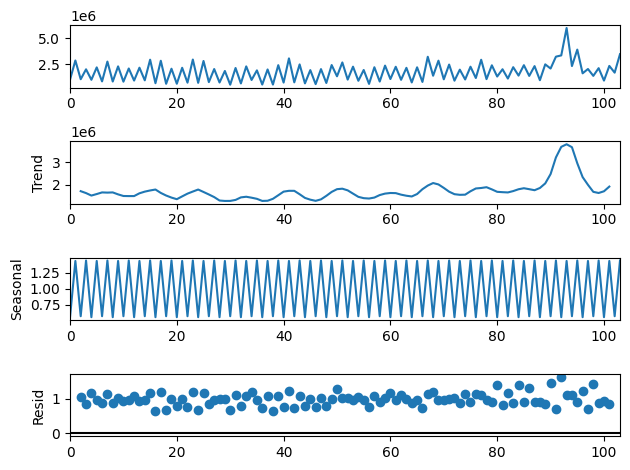

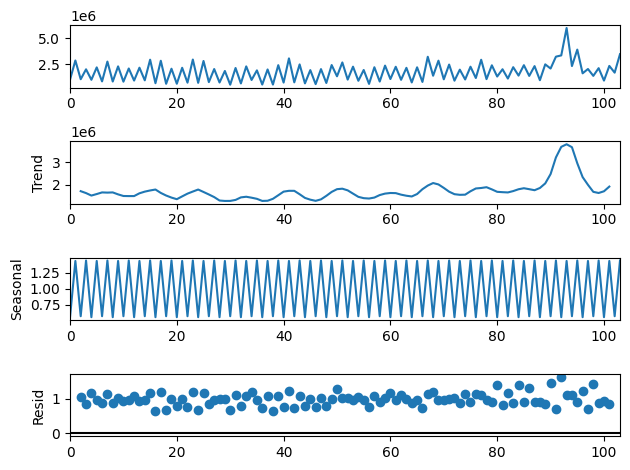

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
data_orig = data_mmm.copy()
# data_orig['event_date'] = pd.to_datetime(data_orig['event_date'])
# data_orig.set_index('event_date', inplace=True)

analysis = data_orig[['total_price_usd']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", period=4)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()

In [53]:
data_mmm['seas'] = seasonal
data_mmm['resid'] = residual
data_mmm['trend'] = trend
data_mmm = data_mmm.fillna(0)
data_mmm.head()

,year,week,provider_account,total_price,total_price_usd,facebook-ads,google-ads,tiktok-ads,pinterest-ads,snapchat-ads,amazon,event_date,seas,resid,trend
0,2022,1,beauty_shop_1,990952.85,990952.85,217754.59,27687.198382,0.00,0.000000,0.0,0.0,2022-01-03,0.553509,0.000000,0.000000e+00
1,2022,1,beauty_shop_2,2849362.10,2849362.10,813526.03,241109.096133,18318.15,24003.427900,0.0,0.0,2022-01-03,1.435476,0.000000,0.000000e+00
2,2022,2,beauty_shop_1,1031501.78,1031501.78,199527.44,30332.405663,0.00,0.000000,0.0,0.0,2022-01-10,0.568635,1.058058,1.714460e+06
3,2022,2,beauty_shop_2,1993365.25,1993365.25,567833.42,167933.527405,13980.30,17784.942176,0.0,0.0,2022-01-10,1.442380,0.848371,1.629001e+06
4,2022,3,beauty_shop_1,976271.12,976271.12,200485.14,30519.897297,0.00,0.000000,0.0,0.0,2022-01-17,0.553509,1.161155,1.518992e+06


In [ ]:
import numpy as np
import pandas as pd
import pystan
import os
def apply_adstock(x, L, P, D):
    '''params:
    x: original media variable, array
    L: length
    P: peak, delay in effect
    D: decay, retain rate
    returns:
    array, adstocked media variable'''
    x = np.append(np.zeros(L-1), x)
 
    weights = np.zeros(L)
    for l in range(L):
        weight = D**((l-P)**2)
        weights[L-1-l] = weight
    
    adstocked_x = []
    for i in range(L-1, len(x)):
        x_array = x[i-L+1:i+1]
        xi = sum(x_array * weights)/sum(weights)
        adstocked_x.append(xi)
    adstocked_x = np.array(adstocked_x)
    return adstocked_x

def hill_transform(x, ec, slope):
    return 1 / (1 + (x / ec)**(-slope))

def apply_mean_center(x):
    mu = np.mean(x)
    xm = x/mu
    return xm, mu
def mean_center_trandform(df, cols):
    df_new = pd.DataFrame()
    sc = {}
    for col in cols:
        x = df[col].values
        df_new[col], mu = apply_mean_center(x)
        sc[col] = mu
    return df_new, sc

def mean_log1p_trandform(df, cols):
    df_new = pd.DataFrame()
    sc = {}
    for col in cols:
        x = df[col].values
        xm, mu = apply_mean_center(x)
        sc[col] = mu
        df_new[col] = np.log1p(xm)
    return df_new, sc



In [56]:
df = data_mmm.copy()
# # media impression
# mdip_cols=[col for col in df.columns if 'mdip_' in col]
# media spending
mdsp_cols=['facebook-ads', 'google-ads', 'tiktok-ads', 'snapchat-ads', 'pinterest-ads', 'amazon']

# # 2. control variables
# # macro economics variables
me_cols = ['resid', 'trend']#[col for col in df.columns if 'me_' in col]
# # store count variables
# st_cols = ['st_ct']
# # markdown/discount variables
# mrkdn_cols = [col for col in df.columns if 'mrkdn_' in col]
# # holiday variables
# hldy_cols = [col for col in df.columns if 'hldy_' in col]
# # seasonality variables
seas_cols = [col for col in df.columns if 'seas' in col]
base_vars = me_cols+ seas_cols  #+st_cols+mrkdn_cols+hldy_cols

# 3. sales variables
sales_cols =['total_price_usd']

data_mmm[['event_date']+mdsp_cols+['total_price_usd']].head()

,event_date,facebook-ads,google-ads,tiktok-ads,snapchat-ads,pinterest-ads,amazon,total_price_usd
0,2022-01-03,217754.59,27687.198382,0.00,0.0,0.000000,0.0,990952.85
1,2022-01-03,813526.03,241109.096133,18318.15,0.0,24003.427900,0.0,2849362.10
2,2022-01-10,199527.44,30332.405663,0.00,0.0,0.000000,0.0,1031501.78
3,2022-01-10,567833.42,167933.527405,13980.30,0.0,17784.942176,0.0,1993365.25
4,2022-01-17,200485.14,30519.897297,0.00,0.0,0.000000,0.0,976271.12


In [47]:
data_mmm

,event_date,provider_account,total_price,total_price_usd,facebook-ads,google-ads,tiktok-ads,pinterest-ads,snapchat-ads,amazon
0,2022-01-02,beauty_shop_1,173954.53,173954.53,31846.09,3593.454221,0.00,0.000000,0.0,0.00
0,2022-01-03,beauty_shop_1,121306.46,121306.46,26763.07,3065.191590,0.00,0.000000,0.0,0.00
0,2022-01-04,beauty_shop_1,123855.43,123855.43,29146.16,4055.082771,0.00,0.000000,0.0,0.00
0,2022-01-05,beauty_shop_1,159204.16,159204.16,32020.69,3944.105033,0.00,0.000000,0.0,0.00
0,2022-01-06,beauty_shop_1,162325.69,162325.69,31756.35,4162.369325,0.00,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
0,2023-01-26,beauty_shop_2,393221.85,393221.85,58249.63,37219.644367,6889.61,1895.073149,0.0,7530.54
0,2023-01-27,beauty_shop_2,412449.83,412449.83,60038.12,42078.910491,6259.95,1201.533601,0.0,6738.74
0,2023-01-28,beauty_shop_2,376156.59,376156.59,64499.36,39330.151761,5162.26,1200.041661,0.0,7477.14
0,2023-01-29,beauty_shop_2,351264.41,351264.41,68114.69,42613.730766,5882.97,1200.040646,0.0,8675.93


In [53]:
data_mmm

,event_date,provider_account,total_price,total_price_usd,facebook-ads,google-ads,tiktok-ads,pinterest-ads,snapchat-ads,amazon
0,2022-01-02,beauty_shop_1,173954.53,173954.53,31846.09,3593.454221,0.00,0.000000,0.0,0.00
0,2022-01-03,beauty_shop_1,121306.46,121306.46,26763.07,3065.191590,0.00,0.000000,0.0,0.00
0,2022-01-04,beauty_shop_1,123855.43,123855.43,29146.16,4055.082771,0.00,0.000000,0.0,0.00
0,2022-01-05,beauty_shop_1,159204.16,159204.16,32020.69,3944.105033,0.00,0.000000,0.0,0.00
0,2022-01-06,beauty_shop_1,162325.69,162325.69,31756.35,4162.369325,0.00,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
0,2023-01-26,beauty_shop_2,393221.85,393221.85,58249.63,37219.644367,6889.61,1895.073149,0.0,7530.54
0,2023-01-27,beauty_shop_2,412449.83,412449.83,60038.12,42078.910491,6259.95,1201.533601,0.0,6738.74
0,2023-01-28,beauty_shop_2,376156.59,376156.59,64499.36,39330.151761,5162.26,1200.041661,0.0,7477.14
0,2023-01-29,beauty_shop_2,351264.41,351264.41,68114.69,42613.730766,5882.97,1200.040646,0.0,8675.93


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
import pandas as pd

data_test = data_mmm[data_mmm['provider_account'] == 'beauty_shop_1'].set_index('event_date').drop(columns=['provider_account', 'total_price'])


X = data_test.drop(columns=['total_price_usd'])
y = data_test['total_price_usd']

lr = LinearRegression()

print(cross_val_score(lr, X, y, cv=TimeSeriesSplit()))
lr.fit(X, y) # refit the model with the complete dataset

print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

[0.44499868 0.77126092 0.83749234 0.87338398 0.7470387 ]
Coefficients: [ 3.80579666 10.24057768  6.18694973  4.1368947   0.          0.        ]
Intercept: -15529.66470901313


In [51]:
data_test.columns

Index(['total_price', 'total_price_usd', 'facebook-ads', 'google-ads',
       'tiktok-ads', 'pinterest-ads', 'snapchat-ads', 'amazon'],
      dtype='object')

In [60]:
import plotly.express as px
import pandas as pd

weights = pd.Series(
lr.coef_,
index=X.columns
)

base = lr.intercept_

unadj_contributions = X.mul(weights).assign(Base=base)

adj_contributions = (unadj_contributions
.div(unadj_contributions.sum(axis=1), axis=0)
.mul(y, axis=0)
) # contains all contributions for each day

fig = px.area(adj_contributions[['facebook-ads', 'google-ads',
'tiktok-ads', 'pinterest-ads', 'snapchat-ads', 'amazon']],
title='Распределение бюджета между каналами. MMM',
labels={'value': 'Sales', 'index': 'Date'})

fig.update_layout(
            xaxis=dict(title='Дата'),
            yaxis=dict(title='Выручка'),
            legend_title='Каналы',
            legend=dict(
            title='Каналы',
            orientation='v',
            yanchor='middle',
            xanchor='right',
            x=1.01,
            y=0.5
            )
)

fig.show()


In [65]:
# ДОРАЗБИРАТЬ СТАТЬЮ

# mean-centralize: sales, numeric base_vars
df = data_mmm[data_mmm.provider_account == 'beauty_shop_1']

base_vars =mdsp_cols
df_ctrl, sc_ctrl = mean_center_trandform(df, ['total_price_usd']+ me_cols + mdsp_cols)
df_ctrl = pd.concat([df_ctrl, df[seas_cols]], axis=1).fillna(0)  #df_ctrl = pd.concat([df_ctrl, df[hldy_cols+seas_cols]], axis=1)
# variables positively related to sales: macro economy, store count, markdown, holiday
pos_vars = [col for col in base_vars if col not in seas_cols]
X1 = df_ctrl[pos_vars].values
# variables may have either positive or negtive impact on sales: seasonality
pn_vars = seas_cols
X2 = df_ctrl[pn_vars].values
ctrl_data = {
 'N': len(df_ctrl),
 'K1': len(pos_vars), 
 'K2': len(pn_vars), 
 'X1': X1,
 'X2': X2, 
 'y': df_ctrl['total_price_usd'].values,
 'max_intercept': min(df_ctrl['total_price_usd'])
}
ctrl_code1 = '''
                data {
                int N; // number of observations
                int K1; // number of positive predictors
                int K2; // number of positive/negative predictors
                real max_intercept; // restrict the intercept to be less than the minimum y
                matrix[N, K1] X1;
                matrix[N, K2] X2;
                vector[N] y; 
                }
                parameters {
                vector<lower=0>[K1] beta1; // regression coefficients for X1 (positive)
                vector[K2] beta2; // regression coefficients for X2
                real<lower=0, upper=max_intercept> alpha; // intercept
                real<lower=0> noise_var; // residual variance
                }
                model {
                // Define the priors
                beta1 ~ normal(0, 1); 
                beta2 ~ normal(0, 1); 
                noise_var ~ inv_gamma(0.05, 0.05 * 0.01);
                // The likelihood
                y ~ normal(X1*beta1 + X2*beta2 + alpha, sqrt(noise_var));
                }
                '''
sm1 = pystan.StanModel(model_code=ctrl_code1, verbose=True)
fit1 = sm1.sampling(data=ctrl_data, iter=2000, chains=4)
fit1_result = fit1.extract()

/var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T/ipykernel_89570/1296789327.py:38: RuntimeWarning: invalid value encountered in divide
  xm = x/mu
/var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T/ipykernel_89570/1296789327.py:38: RuntimeWarning: invalid value encountered in divide
  xm = x/mu
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2078e7b4e33dbb4c8582ecb41d2c553a NOW.
INFO:pystan:OS: darwin, Python: 3.9.2 (default, Oct 12 2022, 15:08:15) 
[Clang 13.0.0 (clang-1300.0.27.3)], Cython 0.29.33


Compiling /var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T/pystan_bf_ncby6/stanfit4anon_model_2078e7b4e33dbb4c8582ecb41d2c553a_5944966645270733488.pyx because it changed.
[1/1] Cythonizing /var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T/pystan_bf_ncby6/stanfit4anon_model_2078e7b4e33dbb4c8582ecb41d2c553a_5944966645270733488.pyx


INFO:root:building 'stanfit4anon_model_2078e7b4e33dbb4c8582ecb41d2c553a_5944966645270733488' extension
INFO:root:creating /var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T/pystan_bf_ncby6/var
INFO:root:creating /var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T/pystan_bf_ncby6/var/folders
INFO:root:creating /var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T/pystan_bf_ncby6/var/folders/zd
INFO:root:creating /var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T/pystan_bf_ncby6/var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn
INFO:root:creating /var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T/pystan_bf_ncby6/var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T
INFO:root:creating /var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T/pystan_bf_ncby6/var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T/pystan_bf_ncby6
INFO:root:clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX12.1.sdk/usr/include -I/Library/Developer/CommandLineToo

In [ ]:
from functions import *
import pandas as pd
import typing
import numpy as np
import config
# type: ignore
from datetime import timedelta
import plotly.express as px
import streamlit as st
import pandas as pd
from functions import *
import ast
import itertools
import plotly.graph_objects as go

data = pd.read_pickle('data_for_mvp.pickle').reset_index(drop=True)
data_revenue = pd.read_csv('final_final_mmm.csv')
data['journey_end_ts'] = pd.to_datetime(data['journey_end_ts']).dt.date
data = data[data['len_tw_source'] <= 15]
# data['tw_source'] = data['tw_source'].apply(lambda x: ast.literal_eval(x))
# data['time_between_order_and_step'] = data['time_between_order_and_step'].apply(lambda x: ast.literal_eval(x))
# data_shop_1, data_shop_2 = prepare_data(data)


In [2]:
def prepare_data1(data:pd.DataFrame) -> pd.DataFrame:

    names_sources = open('names_sources.txt', "r")
    names_sources = names_sources.read()
    names_sources = list(map(lambda x: x.split(','), 
                                                    names_sources.replace("'", '')
                                                                    .replace("]", '')
                                                                    .replace("[", '')
                                                                    .replace('"', '')
                                                                    .replace(' ', '')
                                                                    .split(';')))

    FB_LIST, GOOGLE_LIST, TIKTOK_LIST, SNAPCHAT_LIST, PINTEREST_LIST, KLAVIYO_LIST, EMAIL_LIST, INFLUENCER_LIST = names_sources

    KLAVIYO_LIST.append('kl')

    def clean_data(
        path:list) -> list:
        """
        Args:
            path (list[str]):     - customer journey path (only sources)
        Returns:
            new_path (list[str]): - clean customer journey path
        """
        new_path = []

        for source in path:
            source = source.lower()
            source = source.replace("\n", '')
            source = source.replace("(", '')
            source = source.replace(")", '')
            source = source.replace("[", '')
            source = source.replace("]", '')
            source = source.replace("'", '')
            if source in FB_LIST:
                source = 'facebook'
            elif source in GOOGLE_LIST:
                source = 'google'
            elif source in TIKTOK_LIST:
                source = 'tiktok'
            elif source in SNAPCHAT_LIST:
                source = 'snapchat'
            elif source in PINTEREST_LIST:
                source = 'pinterest'
            elif source in KLAVIYO_LIST:
                source = 'klaviyo'
            elif source in EMAIL_LIST:
                source = 'email'
            elif source in INFLUENCER_LIST:
                source = 'influencer'
            elif source == '':
                source = 'unset'
            new_path.append(source)

        return new_path
    
    # data['tw_source'] = data['tw_source'].apply(lambda x: ast.literal_eval(x))

    data_shop_1 = data[data['shop_name'] == 'beauty_shop_1']
    data_shop_2 = data[data['shop_name'] == 'beauty_shop_2']

    data_shop_2.loc[:, 'tw_source_clean'] = data_shop_2['tw_source'].apply(lambda x: clean_data(x))
    data_shop_1.loc[:, 'tw_source_clean'] = data_shop_1['tw_source'].apply(lambda x: clean_data(x))

    data_shop_1['total_price'] = data_shop_1['total_price'].astype(float)
    data_shop_2['total_price'] = data_shop_2['total_price'].astype(float)

    return data_shop_1, data_shop_2

In [3]:
data_shop_1, data_shop_2 = prepare_data1(data)

/var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T/ipykernel_40422/1985376503.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shop_2.loc[:, 'tw_source_clean'] = data_shop_2['tw_source'].apply(lambda x: clean_data(x))
/var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T/ipykernel_40422/1985376503.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shop_1.loc[:, 'tw_source_clean'] = data_shop_1['tw_source'].apply(lambda x: clean_data(x))
/var/folders/zd/m369b07d12gb3l_95cshmpcw0000gn/T/ipykernel_404

In [4]:
data_shop = data_shop_1.copy()

In [5]:
from operator import add
from functools import reduce


In [35]:
dict(fta)

{'facebook': 230244.31999999948,
 'listrak': 218278.4499999994,
 'google': 105903.16,
 'outbrain': 56870.75999999999,
 'voyage': 49626.729999999996,
 'affiliate': 40503.55999999993,
 'tiktok': 12245.150000000001,
 'bing': 6944.369999999999,
 'smile_rewards': 2824.02,
 'socialmediaposts': 2630.399999999999,
 'shopify': 2607.05,
 'pinterest': 2075.9600000000005,
 'shop_app': 1243.73,
 'unset': 278.2,
 'back-in-stock': 108.28,
 'ctc tiktok': 59.16}

In [36]:
all_channels = [data_shop['tw_source_clean'][i] for i in data_shop['tw_source_clean'].index]
all_channels = list(set(list(np.concatenate(all_channels).flat)))
data_to_download  = pd.DataFrame(index = all_channels)
fta= sort_attribution_result(first_touch_attribution(data_shop, selected_shop)).items()
data_to_download['fta'] = dict(fta)

In [29]:
a = [data_shop['tw_source_clean'][i] for i in data_shop['tw_source_clean'].index]
b = list(set(list(np.concatenate(a).flat)))

In [30]:
data_ = pd.DataFrame(index = b)

In [31]:
selected_shop = 'beauty_shop_1'
data_['fta'] = first_touch_attribution(data_shop, selected_shop)
data_

,fta
mobile,NaN
back-in-stock,108.28
facebook,230244.32
sms_flow,NaN
voyage,49626.73
copy_link,NaN
ctc tiktok,59.16
socialmediaposts,2630.40
unset,278.20
shop_app,1243.73


In [20]:
selected_shop = 'beauty_shop_1'
attribution_results = {}
attribution_results['fta'] = sort_attribution_result(first_touch_attribution(data_shop, selected_shop)).items()
mta_data_shop, budget = prep_data_for_markov_shapley(data_shop) # TODO: оптимизировать подсчет датасета
markov = markov_attribution(mta_data_shop, budget)
attribution_results['markov'] = sort_attribution_result(markov[0]['data']['conversion']).items()


In [ ]:
sort_attribution_result(markov[0]['data']['conversion']).items()

In [27]:
attribution_results[i]

dict_items([('facebook', 230244.31999999948), ('listrak', 218278.4499999994), ('google', 105903.16), ('outbrain', 56870.75999999999), ('voyage', 49626.729999999996), ('affiliate', 40503.55999999993), ('tiktok', 12245.150000000001), ('bing', 6944.369999999999), ('smile_rewards', 2824.02), ('socialmediaposts', 2630.399999999999), ('shopify', 2607.05), ('pinterest', 2075.9600000000005), ('shop_app', 1243.73), ('unset', 278.2), ('back-in-stock', 108.28), ('ctc tiktok', 59.16)])

In [ ]:
all_channels = []
data_shop['tw_source_clean'].sum()

In [76]:
pd.DataFrame(attribution_results['fta'])

,0,1
0,facebook,230244.32
1,listrak,218278.45
2,google,105903.16
3,outbrain,56870.76
4,voyage,49626.73
5,affiliate,40503.56
6,tiktok,12245.15
7,bing,6944.37
8,smile_rewards,2824.02
9,socialmediaposts,2630.40


# Экономический эффект

In [28]:
effectiveness_percent = 0.05
average_salary = 79800

x = np.linspace(60000, 100000, 100)
y = [(1 - effectiveness_percent) * i -  average_salary for i in x]

px.line(x=x, y=y, labels={'x': 'budget', 'y': 'profit'})